<a href="https://colab.research.google.com/github/mohsenshahii/Heart/blob/main/heart_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing Pandas and Seaborn libraries and introducing our Data set

In [4]:
import pandas as pd
import seaborn as sb
from sklearn.metrics import confusion_matrix
heart_df = pd.read_csv('heart_2020_cleaned.csv')
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
Age_Cat= heart_df.groupby('AgeCategory').sum()
print(Age_Cat)

In [ ]:
heart_df['DiffWalking'].value_counts()

# Turning tha Raw Data to a format apropriate for machine learning tools

In [6]:
heart_df['Diabetic'].replace('No, borderline diabetes', 1, inplace = True)
heart_df['Diabetic'].replace('Yes', 2, inplace = True)
heart_df['Diabetic'].replace('Yes (during pregnancy)', 3, inplace = True)
heart_df['DiffWalking'].replace('Yes', 0, inplace = True)
heart_df['DiffWalking'].replace('No', 1, inplace = True)
heart_df.replace('Yes', 1, inplace = True)
heart_df.replace('No', 0, inplace = True)
heart_df['Sex'].replace(['Female', 'Male'], [0, 1], inplace = True)
heart_df['Race'].replace(['White', 'Hispanic', 'Black', 'Other', 'Asian', 'American Indian/Alaskan Native'], [1, 2, 3, 4, 5, 6] , inplace = True)
heart_df['GenHealth'].replace(['Very good','Good', 'Excellent', 'Fair', 'Poor'], [5, 4, 3, 2, 1], inplace = True)
heart_df['AgeCategory'].replace(['18-24','25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)

In [7]:
y_heart = heart_df['HeartDisease']

In [8]:
x_heart = heart_df.drop('HeartDisease', axis=1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_heart, y_heart, test_size=0.3, random_state=1)

# Using sklearn tools to predict the model

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

# Creating a function to measure the accuracy of the model

In [ ]:
y_pred = model.predict(x_train)
sum(y_pred == y_test) / len(y_pred)

In [13]:
y_pred = model.predict(x_test)
sum(y_pred == y_test) / len(y_pred)

0.8446095956805887

# Using a predefined function in sklearn library to measure the accuracy of model

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8446095956805887

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = model.predict(x_test)
sum(y_pred == y_test) / len(y_pred)

0.8654978684372362

In [17]:
CM = confusion_matrix(y_test, y_pred, normalize='all')
CM

array([[0.84320245, 0.0719207 ],
       [0.06258143, 0.02229542]])

# Depicting distribution of differnet variables by histogram

NameError: ignored

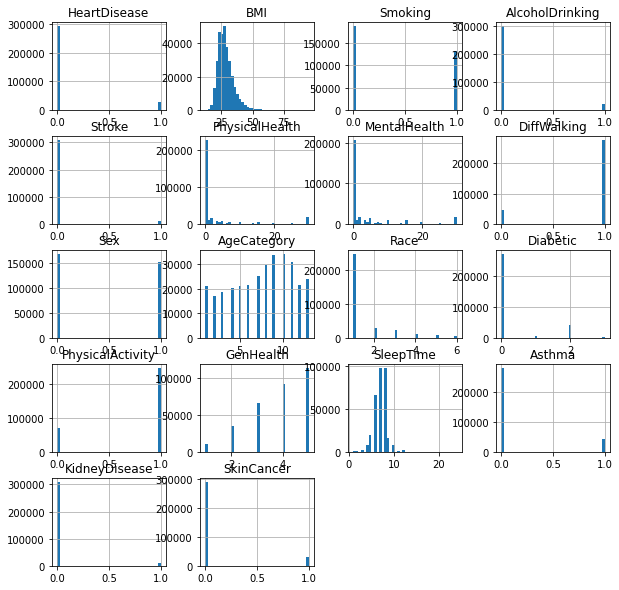

In [18]:
heart_df.hist(bins=40,figsize=(10,10))
plt.show()

# importing matplotlib to use it's data visualization functions

In [19]:
import matplotlib.pyplot as plt

# illustrating correlation between different variables by using heatmap func.

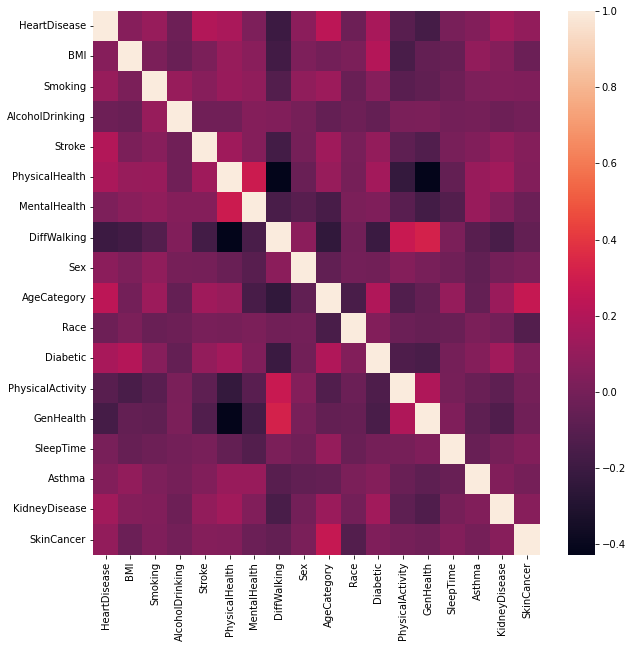

In [20]:
plt.figure(figsize=(10,10))
sb.heatmap(heart_df.corr())
plt.show()

In [ ]:
plt.plot(heart_df['BMI'],heart_df['HeartDisease'])
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(heart_df['BMI'],heart_df['HeartDisease'])

In [21]:
heart_df['SleepTime'].value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

In [22]:
heart_df.columns


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(heart_df['PhysicalHealth'], heart_df['SleepTime'], c=heart_df['HeartDisease'])

# The percentage of Smoking people is shown in orange color in comparison with non smoking poeple that is blue

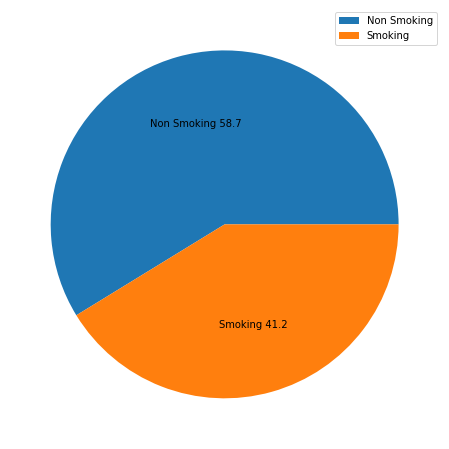

In [45]:
plt.figure(figsize=(15,8))
def label_autopct(pct):
  if pct>50:
     return 'Non Smoking '+ str(pct)[:4]
  return 'Smoking '+ str(pct)[:4]  
plt.pie(heart_df['Smoking'].value_counts(),autopct=lambda x:label_autopct(x))
labels = ['yes' , 'No']
plt.legend(['Non Smoking', 'Smoking'])
plt.show()

In [ ]:
heart_df.groupby('AgeCategory').sum()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
AgeCategory,,,,,,,,,,,,,,,,,
1,130,542666.98,3284,1521,61,35787.0,129597.0,20737,11630,37753,933,18062,83220,151375.0,3727,132,67
2,133,469460.39,5154,1571,90,30557.0,97137.0,16591,8999,29966,1109,14338,66844,118455.0,2868,115,83
3,226,533335.46,7172,1578,131,37850.0,99251.0,18166,9623,32241,2066,15758,73834,128883.0,2845,164,159
4,296,592633.92,8642,1825,193,46065.0,103773.0,19581,10092,34345,3033,16960,80206,140869.0,2879,256,263
5,486,613370.25,9081,1806,293,54087.0,98207.0,19685,10054,34634,3956,17066,81561,144457.0,3065,366,414
6,744,642555.33,8725,1684,428,65827.0,95569.0,19885,10353,35216,5192,17289,83801,150446.0,3135,451,773
7,1383,746867.81,9973,1959,685,91568.0,109695.0,22274,12047,39627,7366,19744,96766,175749.0,3472,700,1289
8,2202,865898.25,12672,2218,1101,119844.0,120693.0,25107,14270,44193,10142,22972,112274,207272.0,3943,998,2188
9,3327,970890.40,15436,2334,1483,145447.0,119604.0,27714,16114,48659,12803,25575,126269,237793.0,4498,1372,3338


# One of intresting points is the percentage of Smoking people in different Age Categories

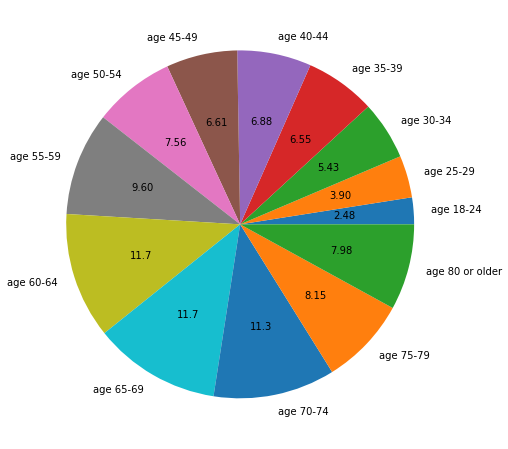

In [ ]:
temp = heart_df.groupby('AgeCategory').sum()
plt.figure(figsize=(15,8))
plt.pie(temp['Smoking'], labels='age ' + Age_Cat.index, autopct=lambda x:str(x)[:4])
plt.show()